# Part 1. Hypothesis Testing

## Libraries

For today's demo, we will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes**, since it has some nice characteristics for linear modeling.

We will be demostrating **hypothesis testing** as it relates to linear modeling. We will dive into how to do linear regression models in later classes.

In [1]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
# this allows plots to appear directly in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [5]:
# read data into a DataFrame
data = pd.read_csv("../../../../data/advertising.csv", index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape


(200, 4)

In [4]:
pd.DataFrame

pandas.core.frame.DataFrame

### Student Question: What are the `features`?

Answer: ?

### Student Question: What is the `response`?

Answer: ?

In [9]:
# print the shape of the DataFrame
# <Code Here>
data.type


AttributeError: 'DataFrame' object has no attribute 'type'

There are 200 **observations** and thus 200 markets in the dataset.

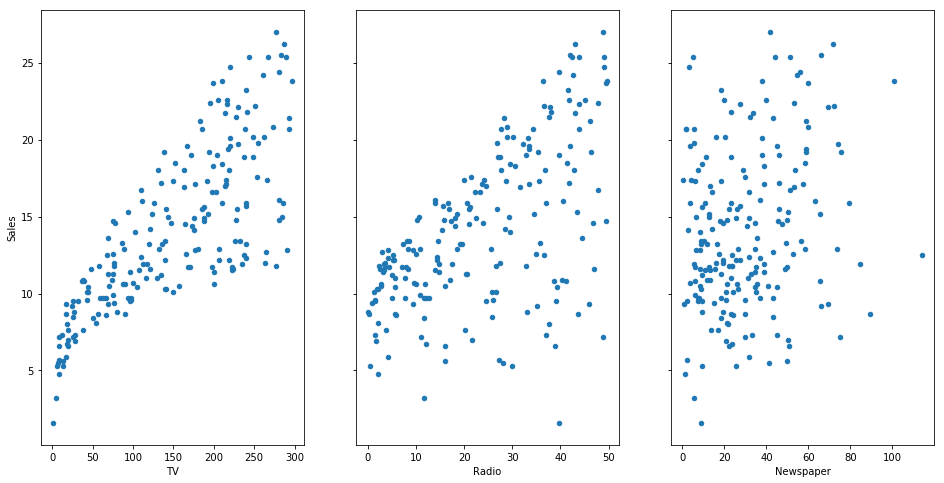

In [10]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = "scatter", x = "TV", y = "Sales", ax = axs[0], figsize = (16, 8))
data.plot(kind = "scatter", x = "Radio", y = "Sales", ax = axs[1])
data.plot(kind = "scatter", x = "Newspaper", y = "Sales", ax = axs[2])
plt.show()

In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


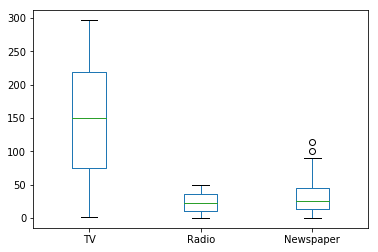

In [12]:
data[["TV" , "Radio" , "Newspaper" ]].plot(kind= "box")
plt.show()

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
1. Is there a relationship between ads and sales?

### Student Question: Is this a causal relationship?

Answer: ?

### Student Question: What other questions might we want to know about this data?

Answer: ?

Let's use **Statsmodels** to estimate the associatione between advertising efforts and sales.

In [13]:
# this is the standard import if you are using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
# formula notation is the equivalent to writting out our models such that "outcome = predictor"
# with the follwing syntax formula = "outcome ~ predictor1 + predictor2 ... predictorN"
lm = smf.ols(formula = "Sales ~ TV", data = data).fit()

# print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 10 Feb 2017   Prob (F-statistic):           1.47e-42
Time:                        20:43:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$

In [ ]:
# manually calculate the prediction
# <Code Here>
tvins = 50000
sales = tvins * 0.047537
salesout = 7.032594 + sales
print salesout



In [17]:
lm.params[0] + lm.params[1] * 50000

2383.8646152001152

Thus, we would predict Sales of **2,383 widgets** in that market.

Of course, we can also use **Statsmodels** to make the prediction:

In [15]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({"TV": [50000]})
X_new.head()

,TV
0,50000


In [16]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 2383.8646152])

# Part 2. Confidence in our Model

**Question:** Is linear regression a high bias/low variance model or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models will not do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you do not have a lot of training data!

A closely related concept is **confidence intervals**. **Statsmodels** calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:

If the **population** from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [18]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data** and not the **entire population of data**. The "true" coefficient is either within this interval or it is not, but there is no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (a hypothesis that is the opposite of the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

Note that "failing to reject" the null is **not** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you do not necessarily have enough data to show that yet.

As it relates to model coefficients, here is the conventional hypothesis test:

- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $H_0: \beta_1 = 0$)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $H_1: \beta_1 \not= 0$)

How do we test this hypothesis? We reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**.

Conversely the **p-value** represents the probability that the coefficient is actually zero:

In [19]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**.

If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. Using 0.05 as the cutoff is a standard convention.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.

- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.